# **What is Text2Emotion?**
Text2Emotion is the python package which will help you to extract the emotions from the content.

*   Processes any textual message and recognizes the emotion embedded in it.
*   Compatible with 5 different emotion categories as Happy, Angry, Sad, Surprise and Fear.



Here we will discuss about the working of package and how you can use it.

## 1. Install the package

In [11]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
pip install text2emotion

Note: you may need to restart the kernel to use updated packages.


In [13]:
import text2emotion as te
from text2emotion import emoji

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gayat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#help(emoji.get_emoji_unicode_dict)
emoji.UNICODE_EMOJI = emoji.get_emoji_unicode_dict('en')

In [5]:
text = "I am mad about someone"

te.get_emotion(text)

{'Happy': 0.0, 'Angry': 1.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.0}

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import operator
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import text2emotion as te
from text2emotion import emoji
import warnings 
warnings.simplefilter("ignore") 

In [2]:
#import dataset 
music =pd.read_csv("C:/Users/gayat/Downloads/muse_v3.csv") 

In [92]:
music.head()

,lastfm_url,track,artist,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,seeds.1,seeds.2,seeds.3,seeds.4,seeds.5,seeds.6,seeds.7,seeds.8,seeds.9,seeds.10
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,fun,sexy,energetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90001 entries, 0 to 90000
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lastfm_url              90001 non-null  object 
 1   track                   90001 non-null  object 
 2   artist                  90001 non-null  object 
 3   number_of_emotion_tags  90001 non-null  int64  
 4   valence_tags            90001 non-null  float64
 5   arousal_tags            90001 non-null  float64
 6   dominance_tags          90001 non-null  float64
 7   mbid                    61217 non-null  object 
 8   spotify_id              61630 non-null  object 
 9   genre                   83362 non-null  object 
 10  seeds.1                 12575 non-null  object 
 11  seeds.2                 4971 non-null   object 
 12  seeds.3                 2010 non-null   object 
 13  seeds.4                 1254 non-null   object 
 14  seeds.5                 828 non-null  

In [75]:
music.isnull().sum()

lastfm_url                    0
track                         0
artist                        0
number_of_emotion_tags        0
valence_tags                  0
arousal_tags                  0
dominance_tags                0
mbid                      28784
spotify_id                28371
genre                      6639
seeds.1                   77426
seeds.2                   85030
seeds.3                   87991
seeds.4                   88747
seeds.5                   89173
seeds.6                   89407
seeds.7                   89671
seeds.8                   89694
seeds.9                   89754
seeds.10                  89819
dtype: int64

In [3]:
music= music.drop(['spotify_id', 'mbid', 'valence_tags', 'arousal_tags', 'dominance_tags', 'number_of_emotion_tags'],axis=1) 

In [4]:
music = music.rename(columns={'seeds.1': 'seeds1', 'seeds.2': 'seeds2','seeds.3': 'seeds3','seeds.4': 'seeds4','seeds.5': 'seeds5','seeds.6': 'seeds6','seeds.7': 'seeds7','seeds.8': 'seeds8','seeds.9': 'seeds9','seeds.10': 'seeds10'})

In [13]:
#ANGRY - acerbic, aggressive, angry, angst-ridden, austere, belligerent, brash, brassy, confrontational, explosive, fierce, fiery, volatile
#        sleazy, savage, rebellious, reckless, harsh, hyper, threatening, demonic, defiant, eccentric

In [14]:
#HAPPY - light, joyous, sarcastic, happy, transparent, pure, sophisticated, agreeable, airy, animated, ambitious, amiable, athletic, atmospheric, benevolent, bright, calm, bravado, carefree, cathartic, celebratory, child-like, soothing, positive, theatrical, peaceful, triumphant, ethereal, exotic, euphoric, feral, good-natured
#        dignified, humorous, visceral, street-smart, optimistic, strong, meditative, erotic, sexual, precious, passionate, lively, cheerful, playful, sweet, laid-back, child-like, comic, confident, devotional, dignified, dreamy, driving, earthy, elegant, ebullient, energetic

In [15]:
#SAD - philosophical, sad, serious, lush, autumnal, grim, lyrical, negative, bitter, bittersweet, bleak, brittle, clinical, complex, consoling, messy, gloomy, sparse, giddy,
#      nostalgic, lonely, thoughtful, trashy, crunchy,cynical, delicate, desperate, detached, druggy, earnest, eligiac, feverish, reserved, quiet, lazy, regretful, consoling

In [16]:
#SURPRISE - romantic, intimate, ironic, trippy, bombastic, campy, capricious, cheerful, crunchy, dramatic, ecstatic, fun
          # effervescent, epic, elaborate, exciting, spicy, exuberant, thrilling, outrageous, silly, indulgent, sugary

In [17]:
#FEAR - suspenseful, anxious, reassuring, apocalyptic, spacey, brooding, self-conscious, cold, dark, suffocating, difficult, distraught, paranoid, nervous,
#       eerie, enigmatic, tense, spooky, urgent, scary, unsettling, halloween, demonic, mysterious

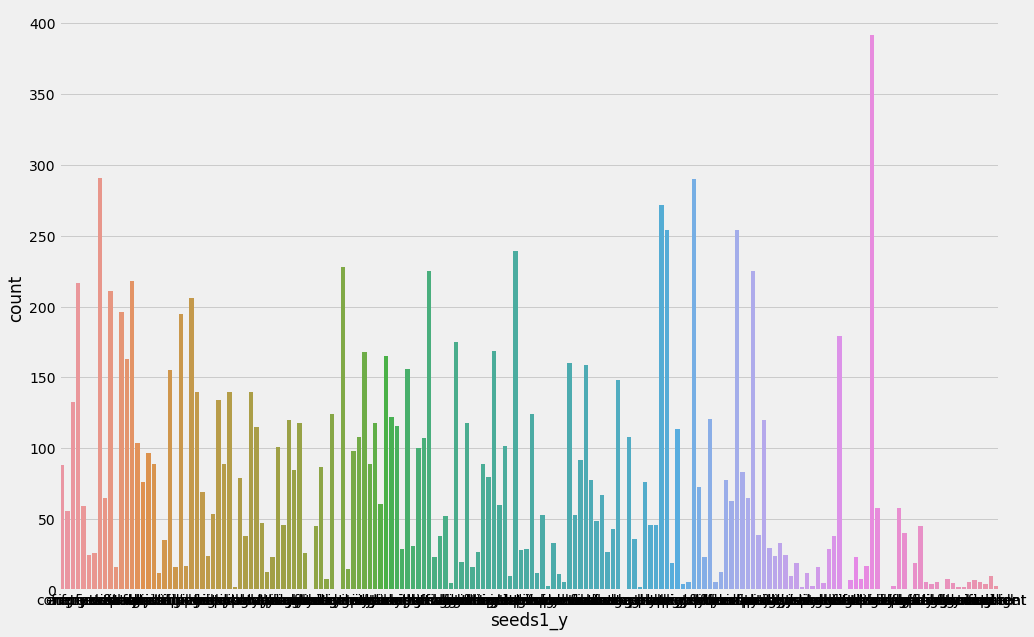

In [116]:
#Visualizing the count plot using the seaborn library.

plt.figure(figsize=(15,10));
sns.countplot(music_new['seeds1_y']);

In [5]:
def filter(x):
    if ((x == 'acerbic') | (x == 'angst-ridden')|(x== 'angry') |(x== 'austere') |(x== 'belligerent') |(x== 'brash') |(x== 'brassy') |(x== 'confrontational') |(x== 'sleazy') |(x== 'savage') |(x== 'rebellious') |(x== 'reckless') |(x== 'harsh') |(x== 'hyper') |(x== 'threatening') |(x== 'demonic') |(x== 'defiant') |(x== 'eccentric') |(x== 'explosive') |(x== 'fierce') |(x== 'fiery') |(x== 'volatile')):
        return 'Angry'    
    if ((x == 'philosophical')|(x == 'sad')|(x == 'serious')|(x == 'lush')|(x == 'autumnal')|(x == 'grim')|(x == 'lyrical')|(x== 'negative')|(x== 'bitter')|(x== 'bittersweet')|(x== 'bleak')|(x== 'brittle')|(x== 'clinical')|(x== 'complex')|(x== 'consoling')|(x== 'messy')|(x== 'gloomy')|(x== 'sparse')|(x== 'giddy')|(x== 'nostalgic')|(x== 'lonely')|(x== 'thoughtful')|(x== 'trashy')|(x== 'crunchy')|(x== 'cynical')|(x== 'delicate')|(x== 'desperate')|(x== 'detached')|(x== 'druggy')|(x== 'earnest')|(x=='eligiac')|(x== 'feverish')|(x== 'reserved')|(x== 'quiet')|(x== 'lazy')|(x== 'regretful')|(x== 'consoling')):
        return 'Sad'
    if ((x == 'light')|(x== 'joyous')|(x== 'sarcastic')|(x== 'happy')|(x== 'transparent')|(x== 'pure')|(x== 'sophisticated')|(x== 'agreeable')|(x== 'airy')|(x== 'animated')|(x== 'ambitious')|(x== 'amiable')|(x== 'athletic')|(x== 'atmospheric')|(x== 'benevolent')|(x== 'bright')|(x== 'calm')|(x== 'bravado')|(x== 'carefree')|(x== 'cathartic')|(x== 'celebratory')|(x== 'soothing')|(x== 'positive')|(x== 'theatrical')|(x== 'peaceful')|(x== 'triumphant')|(x== 'dignified')|(x== 'humorous')|(x== 'visceral')|(x== 'street-smart')|(x== 'optimistic')|(x== 'strong')|(x== 'meditative')|(x== 'erotic')|(x== 'sexual')|(x== 'precious')|(x== 'passionate')|(x== 'lively')|(x== 'cheerful')|(x== 'playful')|(x== 'sweet')|(x== 'laid-back')|(x== 'child-like')|(x== 'comic')|(x== 'confident')|(x== 'devotional')|(x== 'dignified')|(x== 'dreamy')|(x== 'driving')|(x== 'earthy')|(x== 'elegant')|(x== 'ebullient')|(x== 'energetic')|(x== 'ethereal')|(x== 'exotic')|(x== 'euphoric')|(x== 'feral')|(x== 'good-natured')):
        return 'Happy'
    if ((x == 'romantic')|(x== 'intimate')|(x== 'ironic')|(x== 'trippy')|(x== 'bombastic')|(x== 'campy')|(x== 'capricious')|(x== 'cheerful')|(x== 'crunchy')|(x== 'dramatic')|(x== 'ecstatic')|(x== 'effervescent')|(x== 'epic')|(x== 'elaborate')|(x== 'exciting')|(x== 'spicy')|(x== 'exuberant')|(x== 'thrilling')|(x== 'outrageous')|(x== 'silly')|(x== 'indulgent')|(x== 'sugary')|(x== 'fun')):
        return 'Surprise'
    if ((x == 'suspenseful')|(x== 'anxious')|(x== 'reassuring')|(x== 'apocalyptic')|(x== 'spacey')|(x== 'brooding')|(x== 'self-conscious')|(x== 'cold')|(x== 'dark')|(x== 'suffocating')|(x== 'difficult')|(x== 'distraught')|(x== 'paranoid')|(x== 'nervous')|(x== 'eerie')|(x== 'enigmatic')|(x== 'tense')|(x== 'spooky')|(x== 'urgent')|(x== 'scary')|(x== 'unsettling')|(x== 'halloween')|(x== 'demonic')|(x== 'mysterious')):
        return 'Fear'
    
music['seeds1'] = music['seeds1'].apply(filter)
music['seeds2'] = music['seeds2'].apply(filter)
music['seeds3'] = music['seeds3'].apply(filter)
music['seeds4'] = music['seeds4'].apply(filter)
music['seeds5'] = music['seeds5'].apply(filter)
music['seeds6'] = music['seeds6'].apply(filter)
music['seeds7'] = music['seeds7'].apply(filter)
music['seeds8'] = music['seeds8'].apply(filter)
music['seeds9'] = music['seeds9'].apply(filter)
music['seeds10'] = music['seeds10'].apply(filter)

In [6]:
m=music.iloc[:,4:14]
m=m.dropna(how="all")

In [7]:
music.fillna(value=pd.np.nan, inplace=True)

In [8]:
music_new=pd.merge(music, m, left_index=True, right_index=True)

In [9]:
music_new=music_new.drop(['seeds1_x','seeds2_x','seeds3_x','seeds4_x','seeds5_x','seeds6_x','seeds7_x','seeds8_x','seeds9_x','seeds10_x'],axis=1)

In [17]:
music_new['song'] = music_new['track'].map(str) + " by " + music_new['artist']

In [10]:
music_new

,lastfm_url,track,artist,genre,seeds1_y,seeds2_y,seeds3_y,seeds4_y,seeds5_y,seeds6_y,seeds7_y,seeds8_y,seeds9_y,seeds10_y
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,hip-hop,Surprise,None,Happy,None,None,None,None,None,None,None
7,https://www.last.fm/music/deftones/_/7%2bwords,7 Words,Deftones,nu metal,Angry,None,None,None,None,None,None,None,None,None
8,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,singer-songwriter,Angry,Sad,None,None,None,None,None,None,None,None
11,https://www.last.fm/music/pendulum/_/comprachicos,Comprachicos,Pendulum,industrial,Surprise,None,None,None,None,None,None,None,None,None
12,https://www.last.fm/music/deftones/_/when%2bgi...,When Girls Telephone Boys,Deftones,metal,Angry,Happy,Happy,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89054,https://www.last.fm/music/gonzales/_/dot,Dot,Gonzales,piano,Sad,None,None,None,None,None,None,None,None,None
89056,https://www.last.fm/music/azure%2bray/_/we%2ba...,We Are Mice,Azure Ray,indie,Sad,None,None,None,None,None,None,None,None,None
89095,https://www.last.fm/music/gregory%2band%2bthe%...,Doubtful,Gregory and the Hawk,acoustic,Sad,None,None,None,None,None,None,None,None,None
89153,https://www.last.fm/music/david%2bgray/_/last%...,Last Boat to America,David Gray,singer-songwriter,Sad,None,None,None,None,None,None,None,None,None


## corresponding song to prominent mood

In [15]:
text = "The times are difficult! Our sales have been disappointing for the past three quarters for our data analytics product suite. We have a competitive data analytics product suite in the industry. However, we are not doing a good job at selling it, and this is really frustrating."
feel_dict=te.get_emotion(text)
feel_dict

{'Happy': 0.0, 'Angry': 0.25, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.25}

In [16]:
feels=max(feel_dict,key=feel_dict.get)
feels

'Sad'

In [18]:
for row in music_new.itertuples():
    if (feels==row.seeds1_y):
        print(music_new['song'])

3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Bo

Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by

3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Bo

3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Bo

Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by

3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Bo

Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by

Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by

3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Bo

Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by Gregory and the Hawk
89153       Last Boat to America by David Gray
89158                 Paristocrats by Gonzales
Name: song, Length: 12898, dtype: object
3                       Bamboo Banga by M.I.A.
7                          7 Words by Deftones
8                          Limp by Fiona Apple
11                    Comprachicos by Pendulum
12       When Girls Telephone Boys by Deftones
                         ...                  
89054                          Dot by Gonzales
89056                 We Are Mice by Azure Ray
89095         Doubtful by

# MULTINOMIAL NB 

In [49]:
music_new['seeds1_y'] = music_new['seeds1_y'].apply(lambda x: 1 if x=='Angry' else ( 2 if x=='Happy' else x)) 
music_new['seeds1_y'] = music_new['seeds1_y'].apply(lambda x: 4 if x=='Fear'  else ( 5 if x=='Surprise' else 3))

In [50]:
music_new

,lastfm_url,track,artist,genre,seeds1_y,seeds2_y,seeds3_y,seeds4_y,seeds5_y,seeds6_y,seeds7_y,seeds8_y,seeds9_y,seeds10_y
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,hip-hop,5,None,Happy,None,None,None,None,None,None,None
7,https://www.last.fm/music/deftones/_/7%2bwords,7 Words,Deftones,nu metal,3,None,None,None,None,None,None,None,None,None
8,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,singer-songwriter,3,Sad,None,None,None,None,None,None,None,None
11,https://www.last.fm/music/pendulum/_/comprachicos,Comprachicos,Pendulum,industrial,5,None,None,None,None,None,None,None,None,None
12,https://www.last.fm/music/deftones/_/when%2bgi...,When Girls Telephone Boys,Deftones,metal,3,Happy,Happy,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89054,https://www.last.fm/music/gonzales/_/dot,Dot,Gonzales,piano,3,None,None,None,None,None,None,None,None,None
89056,https://www.last.fm/music/azure%2bray/_/we%2ba...,We Are Mice,Azure Ray,indie,3,None,None,None,None,None,None,None,None,None
89095,https://www.last.fm/music/gregory%2band%2bthe%...,Doubtful,Gregory and the Hawk,acoustic,3,None,None,None,None,None,None,None,None,None
89153,https://www.last.fm/music/david%2bgray/_/last%...,Last Boat to America,David Gray,singer-songwriter,3,None,None,None,None,None,None,None,None,None


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(music_new.song, music_new.seeds1_y, test_size = 0.25)

In [53]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [54]:
model = MultinomialNB()
model.fit(X_train_count, Y_train)
MultinomialNB()

MultinomialNB()

In [55]:
X_test_count = v.transform(X_test)

In [56]:
model.score(X_test_count,Y_test)

0.8006201550387597

[[2533   12   12]
 [ 292   34    3]
 [ 324    0   15]]


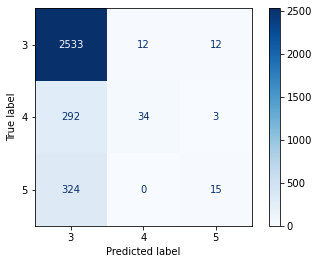

In [57]:
disp = plot_confusion_matrix(model, X_test_count, Y_test,cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show();

In [58]:
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    if analyzer(s):
        d = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k 
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return  c

music_new['WordCount_song'] = music_new['song'].apply(wordcounts)
music_new.head()

,lastfm_url,track,artist,genre,seeds1_y,seeds2_y,seeds3_y,seeds4_y,seeds5_y,seeds6_y,seeds7_y,seeds8_y,seeds9_y,seeds10_y,song,WordCount_song
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,hip-hop,5,None,Happy,None,None,None,None,None,None,None,Bamboo Banga by M.I.A.,"{'bamboo': 1, 'banga': 1, 'by': 1}"
7,https://www.last.fm/music/deftones/_/7%2bwords,7 Words,Deftones,nu metal,3,None,None,None,None,None,None,None,None,None,7 Words by Deftones,"{'by': 1, 'deftones': 1, 'words': 1}"
8,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,singer-songwriter,3,Sad,None,None,None,None,None,None,None,None,Limp by Fiona Apple,"{'apple': 1, 'by': 1, 'fiona': 1, 'limp': 1}"
11,https://www.last.fm/music/pendulum/_/comprachicos,Comprachicos,Pendulum,industrial,5,None,None,None,None,None,None,None,None,None,Comprachicos by Pendulum,"{'by': 1, 'comprachicos': 1, 'pendulum': 1}"
12,https://www.last.fm/music/deftones/_/when%2bgi...,When Girls Telephone Boys,Deftones,metal,3,Happy,Happy,None,None,None,None,None,None,None,When Girls Telephone Boys by Deftones,"{'boys': 1, 'by': 1, 'deftones': 1, 'girls': 1..."


In [59]:
stop = set(stopwords.words("english"))
music_new['song'] = music_new['song'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
music_new.head()

,lastfm_url,track,artist,genre,seeds1_y,seeds2_y,seeds3_y,seeds4_y,seeds5_y,seeds6_y,seeds7_y,seeds8_y,seeds9_y,seeds10_y,song,WordCount_song
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,hip-hop,5,None,Happy,None,None,None,None,None,None,None,Bamboo Banga M.I.A.,"{'bamboo': 1, 'banga': 1, 'by': 1}"
7,https://www.last.fm/music/deftones/_/7%2bwords,7 Words,Deftones,nu metal,3,None,None,None,None,None,None,None,None,None,7 Words Deftones,"{'by': 1, 'deftones': 1, 'words': 1}"
8,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,singer-songwriter,3,Sad,None,None,None,None,None,None,None,None,Limp Fiona Apple,"{'apple': 1, 'by': 1, 'fiona': 1, 'limp': 1}"
11,https://www.last.fm/music/pendulum/_/comprachicos,Comprachicos,Pendulum,industrial,5,None,None,None,None,None,None,None,None,None,Comprachicos Pendulum,"{'by': 1, 'comprachicos': 1, 'pendulum': 1}"
12,https://www.last.fm/music/deftones/_/when%2bgi...,When Girls Telephone Boys,Deftones,metal,3,Happy,Happy,None,None,None,None,None,None,None,When Girls Telephone Boys Deftones,"{'boys': 1, 'by': 1, 'deftones': 1, 'girls': 1..."


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(music_new.song, music_new.seeds1_y, test_size = 0.25)
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
model = MultinomialNB()
model.fit(X_train_count, Y_train)
X_test_count = v.transform(X_test)
model.score(X_test_count,Y_test)

0.8021705426356589

[[2520   23   41]
 [ 255   45   10]
 [ 301    8   22]]


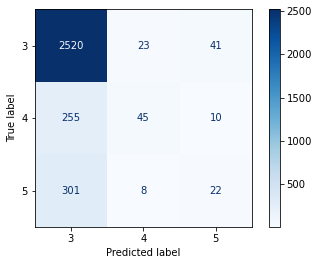

In [61]:
disp = plot_confusion_matrix(model, X_test_count, Y_test,cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show();

In [62]:
Y_predict = model.fit(X_train_count, Y_train).predict(X_test_count)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           3       0.82      0.98      0.89      2584
           4       0.59      0.15      0.23       310
           5       0.30      0.07      0.11       331

    accuracy                           0.80      3225
   macro avg       0.57      0.40      0.41      3225
weighted avg       0.74      0.80      0.75      3225

